In [1]:
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Tetra vs Dimer Violin Plots Otsu2

Instantiate the metric lists that will later become the data frame

In [2]:
areas_list = []
mer_list = []
tag_list = []
phase_list = []

Create the gm and lc filename lists to iterate over

In [3]:
gm_list = ['G1', 'M']
lc_list = ['lacO', 'cbf5']
lac_type_list = ['dimer', 'tetra']

Set up the for loop parse all json files and create metric lists

In [4]:
fname_list = []
for phase in gm_list:
    for tag in lc_list:
        fname = 'quant_' + tag + '_otsu2_data_' + phase + '.json'
        file = open(fname)
        json_dict = json.load(file)
        file.close()
        for lac_type in lac_type_list:
            areas_list.extend(json_dict[lac_type])
            mer_list.extend([lac_type] * len(json_dict[lac_type]))
            phase_list.extend([phase] * len(json_dict[lac_type]))
            tag_list.extend([tag] * len(json_dict[lac_type]))

In [5]:
new_dict = {'phase': phase_list, 'area': areas_list, 'mer': mer_list, 'tag': tag_list}
    

In [6]:
new_df = pd.DataFrame.from_dict(new_dict)

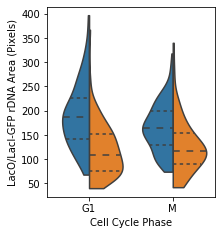

In [7]:
ax = sns.violinplot(hue_order=['dimer', 'tetra'], x='phase', y='area', data=new_df.loc[new_df['tag'] == 'lacO'], hue=new_df['mer'], split=True, inner='quartile', cut=0)
ax.set(ylabel='LacO/LacI-GFP rDNA Area (Pixels)', xlabel='Cell Cycle Phase')
ax.get_legend().remove()
fig = ax.get_figure()
fig.set_size_inches(3, 3.5)
fig.savefig('lacO_otsu2.png', bbox_inches='tight', dpi = 2000)

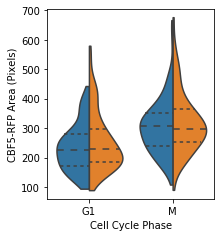

In [8]:
ax = sns.violinplot(hue_order=['dimer', 'tetra'], x='phase', y='area', data=new_df.loc[new_df['tag'] == 'cbf5'], hue=new_df['mer'], split=True, inner='quartile', cut=0)
ax.set(ylabel='CBF5-RFP Area (Pixels)', xlabel='Cell Cycle Phase')
ax.get_legend().remove()
fig = ax.get_figure()
fig.set_size_inches(3, 3.5)
fig.savefig('cbf5_otsu2.png', bbox_inches='tight', dpi = 2000)